In [261]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


In [262]:
# pre-stuffs
exp_path = os.path.join('..', '..', 'data', 'experiment.csv')
exp_info = pd.read_csv(exp_path)
display(exp_info)

behavior_compare = pd.DataFrame(columns=['subject id', 'Real stimulation', 'RT before mean', 'RT after mean',
                                         'RT before median', 'RT after median', 'RT mean shorten', 'RT median shorten',
                                         'RT mean shorten %', 'RT median shorten %'])
behavior_compare['subject id'] = exp_info['subject id']
behavior_compare['Real stimulation'] = exp_info['Real stimulation']


,subject id,order,First Name,Last Name,Label name,Date,Anode,Cathode,Stimulation intensity (mA),Stimulation duration (min),Real stimulation,rand
0,1,2,Yuanbo,Wang,yingpawangzi,2023/03/06,P6,Cz,1.5,15,1,0.060126
1,2,6,Luhua,Xu,Roka,2023/03/12,P9,Cz,1.5,15,0,0.192143
2,3,1,Bin,Li,LB,2023/03/05,P6,Cz,1.5,15,1,0.290711
3,4,3,Teruki,Nishino,ter,2023/03/07,P7,Cz,1.5,15,1,0.426625
4,5,8,Kento,Fujino,TAKA,2023/03/14,P9,Cz,1.5,15,1,0.485314
5,6,5,Zong,Zhang,Conan,2023/03/08,P9,Cz,1.5,15,0,0.493033
6,7,7,Hiroki,Noyama,hn,2023/03/13,P9,Cz,1.5,15,0,0.919895
7,8,4,Chih Hsiang,Chang,IamtheHandsome,2023/03/07,P8,Cz,1.5,15,0,0.934988


In [263]:
for i in range (1,9):
    subject_id = i
    behavior_before_path = os.path.join('..', '..', 'data', str(subject_id), 'behavior_before.csv')
    behavior_before = pd.read_csv(behavior_before_path)
    behavior_after_path = os.path.join('..', '..', 'data', str(subject_id), 'behavior_after.csv')
    behavior_after = pd.read_csv(behavior_after_path)
    # display(behavior_before)

    # box plot of response time
    respond_trials_before = behavior_before[(behavior_before['response'] == 1) & (behavior_before['reaction time'] > 0.001)]
    respond_trials_after = behavior_after[(behavior_after['response'] == 1) & (behavior_after['reaction time'] > 0.001)]
    respond_trials_before = respond_trials_before.copy()
    respond_trials_after = respond_trials_after.copy()
    respond_trials_before.loc[:, 'reaction time'] *= 1000
    respond_trials_after.loc[:, 'reaction time'] *= 1000


    # Extract 'reaction time' column values as lists
    data_before = respond_trials_before['reaction time'].tolist()
    data_after = respond_trials_after['reaction time'].tolist()
    
    # Calculate means of data_before and data_after and add to the dataframe
    mean_before = np.mean(data_before)
    mean_after = np.mean(data_after)
    mean_diff = mean_before - mean_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT before mean'] = mean_before
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT after mean'] = mean_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT mean shorten'] = mean_diff
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT mean shorten %'] = mean_diff/mean_before*100

    median_before = np.median(data_before)
    median_after = np.median(data_after)
    median_diff = median_before - median_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT before median'] = median_before
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT after median'] = median_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT median shorten'] = median_diff
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT median shorten %'] = median_diff/median_before*100

    # # Create a box plot with whiskers
    # fig, ax = plt.subplots()
    # boxplots = ax.boxplot([data_before, data_after], patch_artist=True, widths=0.6, showfliers=False)
    
    # # Plot mean values with markers
    # ax.scatter([1], [mean_before], marker='o', color='black', zorder=3, label='Mean')
    # ax.scatter([2], [mean_after], marker='o', color='black', zorder=3)

    # # Set colors for the box plots
    # colors = ['#1f77b4', '#d62728']
    # for patch, color in zip(boxplots['boxes'], colors):
    #     patch.set_facecolor(color)

    # # Set median line color to black
    # for median in boxplots['medians']:
    #     median.set_color('black')
    # ax.legend()

    # # Customize the plot
    # ax.set_xticklabels(['Before', 'After'])
    # ax.set_ylabel('Reaction time (ms)')

    # isReal = "real stimulation" if exp_info.loc[exp_info['subject id'] == subject_id, 'Real stimulation'].iloc[0] == 1 else "sham stimulation"
    # ax.set_title('Reaction time of subject ' + str(subject_id) + ' with ' + isReal)

    # # Show the plot
    # plt.show()

In [264]:
# remove the rows where the RT median shorten is negative
behavior_compare = behavior_compare[behavior_compare['RT median shorten %'] >= 0]
display(behavior_compare)

,subject id,Real stimulation,RT before mean,RT after mean,RT before median,RT after median,RT mean shorten,RT median shorten,RT mean shorten %,RT median shorten %
0,1,1,231.848908,192.074914,213.4,184.795,39.773994,28.605,17.155135,13.404405
1,2,0,361.8375,314.100598,348.36,307.64,47.736902,40.72,13.192912,11.689057
2,3,1,265.423529,214.902773,241.9,203.58,50.520756,38.32,19.034016,15.841257
4,5,1,329.741776,256.870708,307.93,248.83,72.871068,59.1,22.099434,19.192674
6,7,0,300.601513,283.992101,281.88,260.7,16.609412,21.18,5.525392,7.513836
7,8,0,279.746807,235.567179,265.57,221.36,44.179627,44.21,15.792719,16.647212


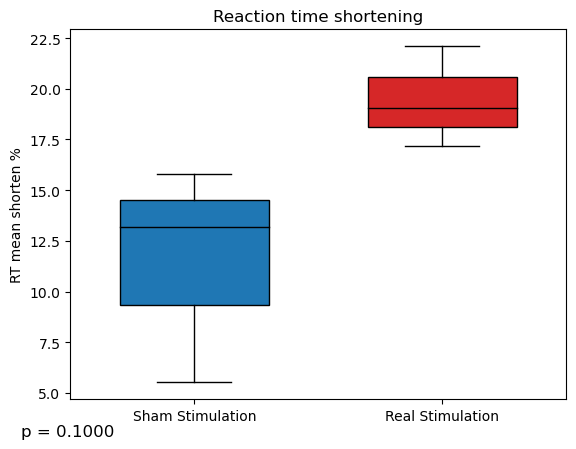

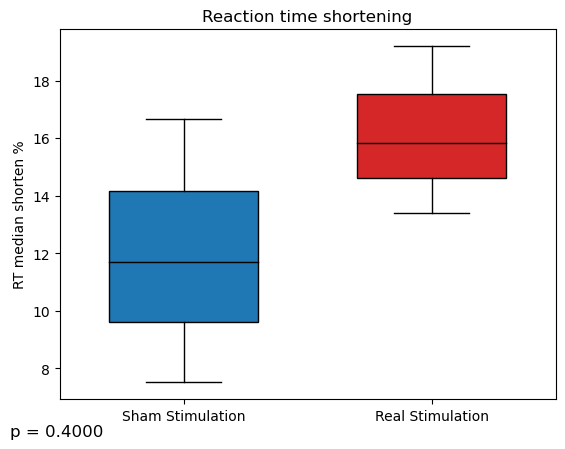

In [265]:
# box plot of RT difference
compare_objects = ["RT mean shorten %", "RT median shorten %"]
for compare_object in compare_objects:
    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)

    plt.show()

## Endo

In [266]:
# endo
behavior_compare = pd.DataFrame(columns=['subject id', 'Real stimulation', 'RT before mean', 'RT after mean',
                                         'RT before median', 'RT after median', 'RT mean shorten', 'RT median shorten',
                                         'RT mean shorten %', 'RT median shorten %'])
behavior_compare['subject id'] = exp_info['subject id']
behavior_compare['Real stimulation'] = exp_info['Real stimulation']

for i in range (1,9):
    subject_id = i
    behavior_before_path = os.path.join('..', '..', 'data', str(subject_id), 'behavior_before.csv')
    behavior_before = pd.read_csv(behavior_before_path)
    behavior_after_path = os.path.join('..', '..', 'data', str(subject_id), 'behavior_after.csv')
    behavior_after = pd.read_csv(behavior_after_path)

    # pick endo
    behavior_before = behavior_before[behavior_before['type'] == 1]
    behavior_after = behavior_after[behavior_after['type'] == 1]

    # display(behavior_before)

    # box plot of response time
    respond_trials_before = behavior_before[(behavior_before['response'] == 1) & (behavior_before['reaction time'] > 0.001)]
    respond_trials_after = behavior_after[(behavior_after['response'] == 1) & (behavior_after['reaction time'] > 0.001)]
    respond_trials_before = respond_trials_before.copy()
    respond_trials_after = respond_trials_after.copy()
    respond_trials_before.loc[:, 'reaction time'] *= 1000
    respond_trials_after.loc[:, 'reaction time'] *= 1000


    # Extract 'reaction time' column values as lists
    data_before = respond_trials_before['reaction time'].tolist()
    data_after = respond_trials_after['reaction time'].tolist()
    
    # Calculate means of data_before and data_after and add to the dataframe
    mean_before = np.mean(data_before)
    mean_after = np.mean(data_after)
    mean_diff = mean_before - mean_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT before mean'] = mean_before
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT after mean'] = mean_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT mean shorten'] = mean_diff
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT mean shorten %'] = mean_diff/mean_before*100

    median_before = np.median(data_before)
    median_after = np.median(data_after)
    median_diff = median_before - median_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT before median'] = median_before
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT after median'] = median_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT median shorten'] = median_diff
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT median shorten %'] = median_diff/median_before*100


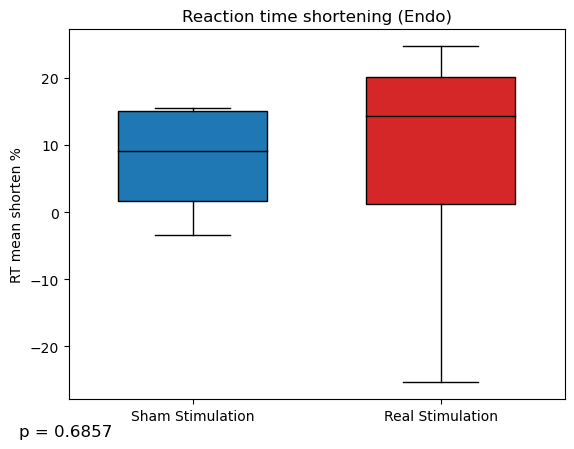

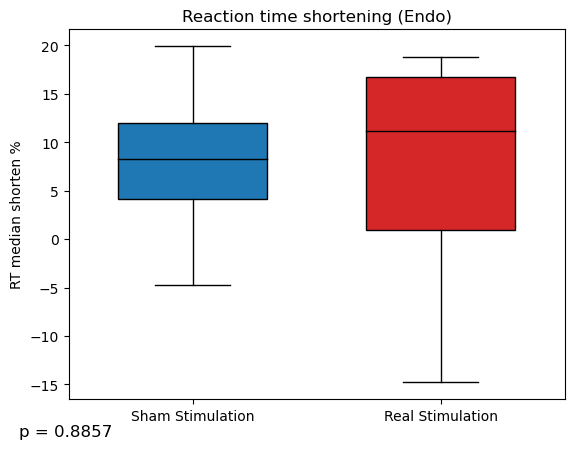

In [267]:
# remove the rows where the RT median shorten is negative
# behavior_compare = behavior_compare[behavior_compare['RT median shorten %'] >= 0]
# display(behavior_compare)

# box plot of RT difference
compare_objects = ["RT mean shorten %", "RT median shorten %"]
for compare_object in compare_objects:
    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening (Endo)')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)

    plt.show()

## Exo

In [268]:
# exo
behavior_compare = pd.DataFrame(columns=['subject id', 'Real stimulation', 'RT before mean', 'RT after mean',
                                         'RT before median', 'RT after median', 'RT mean shorten', 'RT median shorten',
                                         'RT mean shorten %', 'RT median shorten %'])
behavior_compare['subject id'] = exp_info['subject id']
behavior_compare['Real stimulation'] = exp_info['Real stimulation']

for i in range (1,9):
    subject_id = i
    behavior_before_path = os.path.join('..', '..', 'data', str(subject_id), 'behavior_before.csv')
    behavior_before = pd.read_csv(behavior_before_path)
    behavior_after_path = os.path.join('..', '..', 'data', str(subject_id), 'behavior_after.csv')
    behavior_after = pd.read_csv(behavior_after_path)

    # pick endo
    behavior_before = behavior_before[behavior_before['type'] == 2]
    behavior_after = behavior_after[behavior_after['type'] == 2]

    # display(behavior_before)

    # box plot of response time
    respond_trials_before = behavior_before[(behavior_before['response'] == 1) & (behavior_before['reaction time'] > 0.001)]
    respond_trials_after = behavior_after[(behavior_after['response'] == 1) & (behavior_after['reaction time'] > 0.001)]
    respond_trials_before = respond_trials_before.copy()
    respond_trials_after = respond_trials_after.copy()
    respond_trials_before.loc[:, 'reaction time'] *= 1000
    respond_trials_after.loc[:, 'reaction time'] *= 1000


    # Extract 'reaction time' column values as lists
    data_before = respond_trials_before['reaction time'].tolist()
    data_after = respond_trials_after['reaction time'].tolist()
    
    # Calculate means of data_before and data_after and add to the dataframe
    mean_before = np.mean(data_before)
    mean_after = np.mean(data_after)
    mean_diff = mean_before - mean_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT before mean'] = mean_before
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT after mean'] = mean_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT mean shorten'] = mean_diff
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT mean shorten %'] = mean_diff/mean_before*100

    median_before = np.median(data_before)
    median_after = np.median(data_after)
    median_diff = median_before - median_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT before median'] = median_before
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT after median'] = median_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT median shorten'] = median_diff
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT median shorten %'] = median_diff/median_before*100

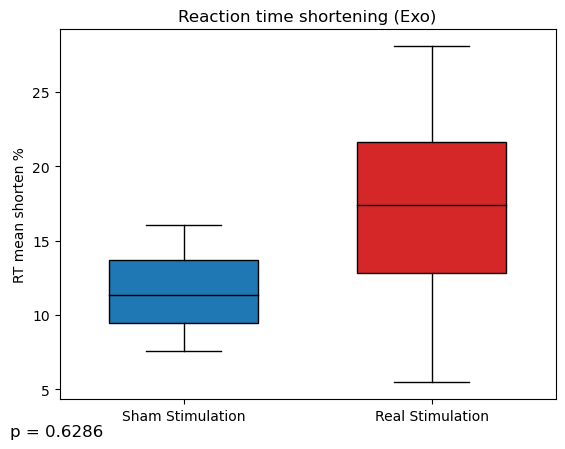

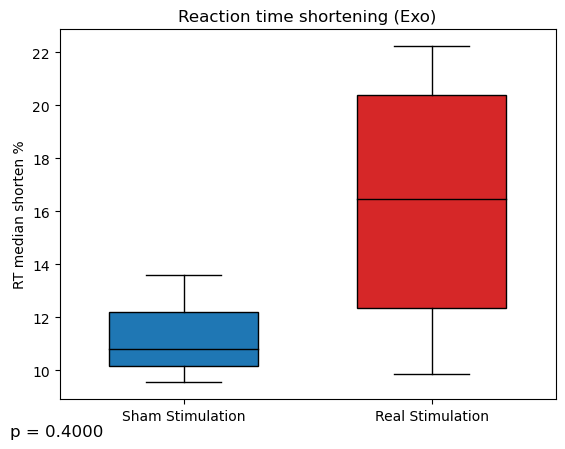

In [269]:
# remove the rows where the RT median shorten is negative
behavior_compare = behavior_compare[behavior_compare['RT median shorten %'] >= 0]
# display(behavior_compare)

# box plot of RT difference
compare_objects = ["RT mean shorten %", "RT median shorten %"]
for compare_object in compare_objects:
    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening (Exo)')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)

    plt.show()

## Any filter

,type,cue,valid,ICS,stimulus side,stimulus x,stimulus y,response,reaction time
2,1,-1,-1,0.5,1,1131,220,1,0.40884
3,1,-1,-1,0.5,1,969,-220,1,0.22220
18,1,-1,-1,0.5,1,1131,0,1,0.20330
40,1,1,-1,0.5,-1,1131,0,1,0.50352
43,1,1,-1,0.5,-1,1131,220,1,0.36744
50,1,1,-1,1.0,-1,1131,0,1,0.29488
69,1,-1,-1,1.0,1,1131,0,1,0.19705
71,1,1,-1,1.0,-1,1131,220,1,0.22703
76,1,-1,-1,1.0,1,1131,220,1,0.26406
78,1,1,-1,1.0,-1,969,-220,1,0.52701


,type,cue,valid,ICS,stimulus side,stimulus x,stimulus y,response,reaction time
2,1,-1,-1,1.0,1,1131,220,1,0.68015
12,1,-1,-1,0.5,1,1131,220,1,0.60485
17,1,-1,-1,0.5,1,969,-220,1,0.45601
46,1,-1,-1,0.5,1,1131,0,1,0.43045
63,1,1,-1,1.0,-1,969,-220,0,0.00000
68,1,1,-1,1.0,-1,1131,220,1,0.50563
72,1,1,-1,0.5,-1,1131,220,1,0.31813
87,1,1,-1,0.5,-1,1131,0,1,0.54693
97,1,1,-1,1.0,-1,1131,0,1,0.64781
100,1,-1,-1,1.0,1,1131,0,1,0.32889


,type,cue,valid,ICS,stimulus side,stimulus x,stimulus y,response,reaction time
24,1,1,-1,1.0,-1,1131,220,1,0.44173
27,1,-1,-1,1.0,1,969,-220,1,0.28183
30,1,1,-1,1.0,-1,969,-220,1,0.35581
46,1,-1,-1,0.5,1,1131,0,1,0.31769
48,1,-1,-1,0.5,1,1131,220,1,0.27519
58,1,-1,-1,0.5,1,969,-220,1,0.48011
85,1,1,-1,0.5,-1,1131,220,1,0.30252
89,1,-1,-1,1.0,1,1131,220,1,0.29893
104,1,1,-1,0.5,-1,969,-220,1,0.51292
109,1,-1,-1,1.0,1,1131,0,1,0.22534


,type,cue,valid,ICS,stimulus side,stimulus x,stimulus y,response,reaction time
25,1,1,-1,0.5,-1,969,-220,1,0.23747
31,1,-1,-1,0.5,1,1131,0,1,0.15752
41,1,-1,-1,0.5,1,969,-220,1,0.21233
55,1,1,-1,1.0,-1,1131,220,1,0.29013
56,1,1,-1,0.5,-1,1131,0,1,0.30208
58,1,-1,-1,1.0,1,969,-220,1,0.20504
61,1,1,-1,1.0,-1,1131,0,1,0.20542
62,1,-1,-1,0.5,1,1131,220,1,0.36841
76,1,1,-1,0.5,-1,1131,220,1,0.41377
96,1,-1,-1,1.0,1,1131,220,1,0.24773


,type,cue,valid,ICS,stimulus side,stimulus x,stimulus y,response,reaction time
1,1,1,-1,1.0,-1,969,-220,1,0.46743
4,1,-1,-1,0.5,1,1131,0,1,0.37669
6,1,1,-1,0.5,-1,969,-220,1,0.74601
8,1,1,-1,0.5,-1,1131,0,1,0.49214
11,1,1,-1,1.0,-1,1131,220,1,0.59007
20,1,-1,-1,1.0,1,1131,0,1,0.31333
30,1,-1,-1,1.0,1,969,-220,1,0.55059
39,1,-1,-1,1.0,1,1131,220,0,0.00000
57,1,-1,-1,0.5,1,1131,220,1,0.73268
66,1,1,-1,1.0,-1,1131,0,1,0.49537


,type,cue,valid,ICS,stimulus side,stimulus x,stimulus y,response,reaction time
10,1,-1,-1,0.5,1,969,-220,1,0.32468
23,1,-1,-1,1.0,1,1131,0,1,0.25682
30,1,-1,-1,1.0,1,969,-220,1,0.55233
39,1,1,-1,0.5,-1,1131,0,1,0.32625
41,1,1,-1,1.0,-1,1131,220,1,0.29299
54,1,-1,-1,1.0,1,1131,220,1,0.54479
63,1,1,-1,0.5,-1,1131,220,1,0.49128
84,1,1,-1,0.5,-1,969,-220,1,0.39823
93,1,1,-1,1.0,-1,969,-220,1,0.44300
109,1,1,-1,1.0,-1,1131,0,1,0.30129


,type,cue,valid,ICS,stimulus side,stimulus x,stimulus y,response,reaction time
0,1,-1,-1,0.5,1,1131,0,1,0.46699
11,1,1,-1,0.5,-1,1131,0,1,0.40387
27,1,-1,-1,0.5,1,1131,220,1,0.34980
31,1,1,-1,1.0,-1,1131,0,1,0.26351
40,1,1,-1,1.0,-1,1131,220,1,0.45970
59,1,1,-1,0.5,-1,969,-220,1,0.23514
64,1,1,-1,0.5,-1,1131,220,1,0.28022
70,1,-1,-1,1.0,1,1131,0,1,0.26522
71,1,-1,-1,0.5,1,969,-220,1,0.35053
80,1,1,-1,1.0,-1,969,-220,0,0.00000


,type,cue,valid,ICS,stimulus side,stimulus x,stimulus y,response,reaction time
10,1,-1,-1,1.0,1,969,-220,1,0.40020
38,1,1,-1,0.5,-1,1131,220,1,0.23445
55,1,-1,-1,0.5,1,1131,0,1,0.26841
78,1,-1,-1,0.5,1,969,-220,1,0.37695
80,1,1,-1,0.5,-1,969,-220,1,0.40681
88,1,1,-1,1.0,-1,969,-220,1,0.22006
94,1,-1,-1,0.5,1,1131,220,1,0.28060
96,1,1,-1,1.0,-1,1131,0,1,0.14300
97,1,-1,-1,1.0,1,1131,0,1,0.27312
100,1,-1,-1,1.0,1,1131,220,1,0.30431


/Users/tianyi/opt/anaconda3/envs/mne/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/tianyi/opt/anaconda3/envs/mne/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


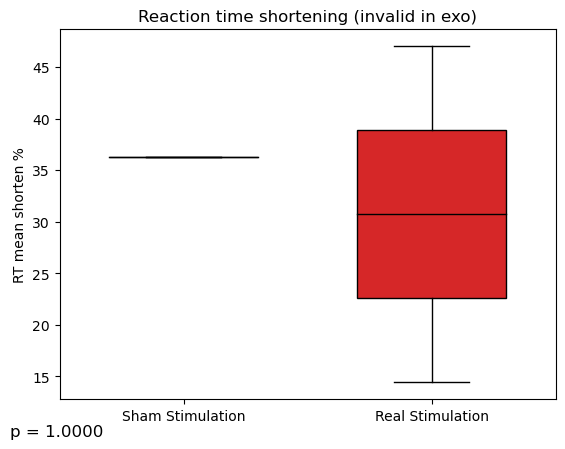

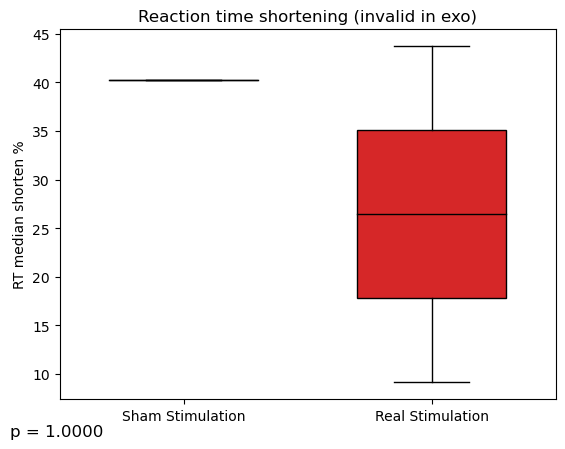

In [270]:
# exo
behavior_compare = pd.DataFrame(columns=['subject id', 'Real stimulation', 'RT before mean', 'RT after mean',
                                         'RT before median', 'RT after median', 'RT mean shorten', 'RT median shorten',
                                         'RT mean shorten %', 'RT median shorten %'])
behavior_compare['subject id'] = exp_info['subject id']
behavior_compare['Real stimulation'] = exp_info['Real stimulation']

for i in range (1,9):
    subject_id = i
    behavior_before_path = os.path.join('..', '..', 'data', str(subject_id), 'behavior_before.csv')
    behavior_before = pd.read_csv(behavior_before_path)
    behavior_after_path = os.path.join('..', '..', 'data', str(subject_id), 'behavior_after.csv')
    behavior_after = pd.read_csv(behavior_after_path)

    # FILTERING
    behavior_before = behavior_before[(behavior_before['valid'] == -1) & (behavior_before['type'] == 1)]
    behavior_after = behavior_after[(behavior_after['valid'] == -1) & (behavior_before['type'] == 1)]
    display(behavior_before)

    # display(behavior_before)

    # box plot of response time
    respond_trials_before = behavior_before[(behavior_before['response'] == 1) & (behavior_before['reaction time'] > 0.001)]
    respond_trials_after = behavior_after[(behavior_after['response'] == 1) & (behavior_after['reaction time'] > 0.001)]
    respond_trials_before = respond_trials_before.copy()
    respond_trials_after = respond_trials_after.copy()
    respond_trials_before.loc[:, 'reaction time'] *= 1000
    respond_trials_after.loc[:, 'reaction time'] *= 1000


    # Extract 'reaction time' column values as lists
    data_before = respond_trials_before['reaction time'].tolist()
    data_after = respond_trials_after['reaction time'].tolist()
    
    # Calculate means of data_before and data_after and add to the dataframe
    mean_before = np.mean(data_before)
    mean_after = np.mean(data_after)
    mean_diff = mean_before - mean_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT before mean'] = mean_before
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT after mean'] = mean_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT mean shorten'] = mean_diff
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT mean shorten %'] = mean_diff/mean_before*100

    median_before = np.median(data_before)
    median_after = np.median(data_after)
    median_diff = median_before - median_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT before median'] = median_before
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT after median'] = median_after
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT median shorten'] = median_diff
    behavior_compare.loc[behavior_compare['subject id'] == subject_id, 'RT median shorten %'] = median_diff/median_before*100

    # remove the rows where the RT median shorten is negative

behavior_compare = behavior_compare[behavior_compare['RT median shorten %'] >= 0]
behavior_compare = behavior_compare[behavior_compare['RT mean shorten %'] >= 0]
# display(behavior_compare)

# box plot of RT difference
compare_objects = ["RT mean shorten %", "RT median shorten %"]
for compare_object in compare_objects:
    rt_diff_sham = behavior_compare.loc[behavior_compare['Real stimulation'] == 0, compare_object]
    rt_diff_real = behavior_compare.loc[behavior_compare['Real stimulation'] == 1, compare_object]
    rt_diff_sham = pd.to_numeric(rt_diff_sham)
    rt_diff_real = pd.to_numeric(rt_diff_real)

    # create boxplot
    # Create a box plot with whiskers
    fig, ax = plt.subplots()
    boxplots = ax.boxplot([rt_diff_sham, rt_diff_real], patch_artist=True, widths=0.6, showfliers=False)

    # Set colors for the box plots
    colors = ['#1f77b4', '#d62728']
    for patch, color in zip(boxplots['boxes'], colors):
        patch.set_facecolor(color)

    # Set median line color to black
    for median in boxplots['medians']:
        median.set_color('black')

    plt.xticks([1, 2], ['Sham Stimulation', 'Real Stimulation'])
    plt.ylabel(compare_object)
    plt.title('Reaction time shortening (invalid in exo)')

    # Perform the Mann-Whitney U test
    U, p_value = stats.mannwhitneyu(rt_diff_sham, rt_diff_real)

    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.4f}',
                xy=(-0.1, -0.1),
                xycoords=('axes fraction', 'axes fraction'),
                ha='left', fontsize=12)

    plt.show()